# (review) Graph Neural Network-Based Anomaly Detection in Multivariate Time Series
> 논문

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [GNN]

- 생각해본 자료
    - https://www.airkorea.or.kr/web/pmRelay?itemCode=11008&pMENU_NO=109
    - 미세먼지(일평균)
    
    
git 사용

github code : https://github.com/d-ailin/GDN

https://arxiv.org/pdf/2106.06947.pdf

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

## 3 Proposed Framework

### 3.1 Problem Statement

- $N$ 개 sensors
- $T_{min}$ 개 time stick
- $S_{train} = [ s^{(1)}_{train} \dots s^{(T_{min}}_{train} ]$

In [52]:
Strain = pd.concat([pd.DataFrame([f"서울{idx}" for idx in range(1,366)]).T,
           pd.DataFrame([f"경기{idx}" for idx in range(1,366)]).T,
          pd.DataFrame([f"부산{idx}" for idx in range(1,366)]).T],axis=0)
Strain

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,서울1,서울2,서울3,서울4,서울5,서울6,서울7,서울8,서울9,서울10,...,서울356,서울357,서울358,서울359,서울360,서울361,서울362,서울363,서울364,서울365
0,경기1,경기2,경기3,경기4,경기5,경기6,경기7,경기8,경기9,경기10,...,경기356,경기357,경기358,경기359,경기360,경기361,경기362,경기363,경기364,경기365
0,부산1,부산2,부산3,부산4,부산5,부산6,부산7,부산8,부산9,부산10,...,부산356,부산357,부산358,부산359,부산360,부산361,부산362,부산363,부산364,부산365


In [55]:
Strain_1 = Strain.iloc[:,0]
Strain_1

0    서울1
0    경기1
0    부산1
Name: 0, dtype: object

In [56]:
Strain_365 = Strain.iloc[:,364]
Strain_365

0    서울365
0    경기365
0    부산365
Name: 364, dtype: object

$S_{train}^{(t)} \in \mathbb{R}^{N}$

In [58]:
Stest = pd.concat([pd.DataFrame([f"서울{idx}" for idx in range(366,731)]).T,
           pd.DataFrame([f"경기{idx}" for idx in range(366,731)]).T,
          pd.DataFrame([f"부산{idx}" for idx in range(366,731)]).T],axis=0)
Stest

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,서울366,서울367,서울368,서울369,서울370,서울371,서울372,서울373,서울374,서울375,...,서울721,서울722,서울723,서울724,서울725,서울726,서울727,서울728,서울729,서울730
0,경기366,경기367,경기368,경기369,경기370,경기371,경기372,경기373,경기374,경기375,...,경기721,경기722,경기723,경기724,경기725,경기726,경기727,경기728,경기729,경기730
0,부산366,부산367,부산368,부산369,부산370,부산371,부산372,부산373,부산374,부산375,...,부산721,부산722,부산723,부산724,부산725,부산726,부산727,부산728,부산729,부산730


In [59]:
Steat_1 = Stest.iloc[:,0]
Steat_1

0    서울366
0    경기366
0    부산366
Name: 0, dtype: object

In [62]:
Stest_365 = Stest.iloc[:,364]
Stest_365

0    서울730
0    경기730
0    부산730
Name: 364, dtype: object

$a(t) \in \{ 0,1 \}$

$a(t) = 1$  indicates that time t is anomalous.

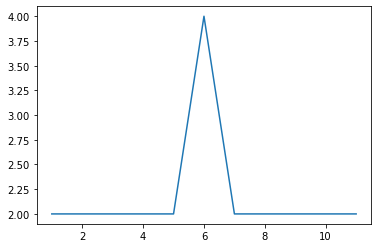

In [68]:
plt.plot([1,2,3,4,5,6,7,8,9,10,11],[2,2,2,2,2,4,2,2,2,2,2])

여기서 $a(6) = 1$, 나머지는 0

### 3.3 Sensor Embedding

we do this by introducing an embedding vector for each sensor, representing its characteristics:

$v_i \in \mathbb{R}^{d} , \text{for  } i \in \{ 1,2, \dots , N \}$

In [77]:
['V_서울','V_부산', 'V_경기']

['V_서울', 'V_부산', 'V_경기']

In [80]:
v_서울 = pd.DataFrame([f"서울{idx}" for idx in range(1,10)]).T
v_서울

,0,1,2,3,4,5,6,7,8
0,서울1,서울2,서울3,서울4,서울5,서울6,서울7,서울8,서울9


$v_i$의 $d$ 는 임의로 정하는 것이며, 이는 $S_{traIn}$의 행을 의미한다.
- v_서울은 1행에서 10개를 뽑은 것

### 3.4 Graph Structure Learning

This prior information can be flexibly represented as a set of candidate relations $\mathcal{C}_i$ for each sensor $i$, i.e. the sensors it could be dependent on:

$\mathcal{C}_i \subseteq \{ 1,2, \dots , N \} \ \{ i \}$

In [81]:
C_서울 = ['경기','인천']
C_서울

['경기', '인천']

위와 같이 인접 구역을 의미하며, 인접 거리에 대한 정의는 임의로

$e_{ji} = \cfrac{v_i^{\top} v_j}{||v_i||\cdot||v_j||} \text{for  } j \in \mathcal{C}_i$

위는 distance 개념

$A_{ji} = \mathbb{1} \{ j \in \text{TopK } (\{e_{ki} : k \in \mathcal(C)_i \} ) \}$

연결 되면 1이 되고, 연결되어 있지 않으면 0이 된다.

cosine 유사도가 높은 몇 개들이 선택될 걸

$e_{ji}$와 $A_{ji}$는 모두 $\mathcal{C}_i$의 연장선이다.

$\mathcal{C}_i$에서 아무리 길게 정해도 $A_{ji}$에서 정한 top을 넘으면 잘림!

TopK denotes the indices of top-k values among its input (i.e. the normalized dot products).

###  3.5 Graph Attention-Based Forecasting

$x^{(t)} \in \mathbb{R}^{N \times w}$

$x^{(t)} := [s^{(t-w)},s^{(t-w+1)},\dots, s^{(t-1)}]$

In [92]:
x_t = pd.DataFrame([['서울1','서울2','서울t-w','서울t-2','서울t-1'],['경기1','경기2','경기t-w','경기t-2','경기t-1'],['인천1','인천2','인천t-w','인천t-2','인천t-1']])
x_t

,0,1,2,3,4
0,서울1,서울2,서울t-w,서울t-2,서울t-1
1,경기1,경기2,경기t-w,경기t-2,경기t-1
2,인천1,인천2,인천t-w,인천t-2,인천t-1


이 $x_t$는 $S_{train}$에서 추출된 w 열 만큼의 데이터이다.

그리고 w는 moving 수, window(siding window size)를 의미한다.

In [99]:
s_t_1 = x_t.iloc[:,4] # S(t-1)
s_t_1

0    서울t-1
1    경기t-1
2    인천t-1
Name: 4, dtype: object

In [100]:
s_t_w = x_t.iloc[:,2] # S(t-w)
s_t_w

0    서울t-w
1    경기t-w
2    인천t-w
Name: 2, dtype: object

여기서 입력 데이터는 $N \times w$ size의 $S$

**Feature Extractor**

$z_i^{(t)} = \text{ReLU} \big( \alpha_{i,i} \mathbf{W} x_{i}^{(t)} + \sum_{j \in \mathbb{N}(i)} \alpha_{i,j} \mathbf{W} x_{j}^{(t)} \big)$

여기서 $z_{i}^{(t)}$는 $d \times 1$ 행렬

$x_{i}^{(t)} \in \mathbb{R}^{w}$

$\mathcal{N}(i) = \{ j | A_{ji} > 0 \}$

$\mathcal{N}(i) = \mathcal{N}(서울) = \{ 경기, 인천 \}$

$\mathbf{W} \in \mathbb{R}^{d \times w}$

우리가 학습시킬 $\mathbf{W}$

$g_{i}^{(t)} = v_i \oplus \mathbf{W} x_{i}^{(t)}$

(2d X 1) = (d X 1) (d X 1)

$\pi(i,j) = \text{LeakyReLU}(a^{\top}(g_{i}^{(t)} \oplus g_{j}^{(t)}))$

$\pi(i,j) = X\hat{\beta}$

$\alpha_{i,j} = \cfrac{exp(\pi(i,j))}{\sum_{k \in \mathbb{N} \cup\{ i\}}exp(\pi (i,k))}$

$\alpha$는 확률 p랑 비슷, feature가 비슷하면 1에 가까울 것, 거리 상관 없이
- i가 j에 끼치는 영향이 z의 relu구하는 식에서 사라질테니까

We use LeakyReLU as the non-linear activation to compute the attention coefficient, and normalize the attention coefficents using the **softmax function** in Eq. (8)(알파 구하는 식을 의미).

**Output Layer**

From the above feature extractor, we obtain representations for all $N$ nodes, namely $\{ z^{(t)}_{1},\dots , z^{(t)}_{N} \}$. For each $z^{(t)}_{i}$, we *element-wise* multiply (denoted ◦) it with the *corresponding time series embedding* $v_i$, and use the results across all nodes as the input of stacked *fully-connected layers* with output dimensionality N, to predict the vector of sensor values at time step $t$, i.e. $s^{(t)}$:

$\hat{s}^{(t)} = f_{\theta} ([v_1 \circ z_{1}^{(t)} , \dots , v_N \circ z_{N}^{(t)}])$

여기서 $v_1$과 $z_{i}^{(t)}$는 모두 $d \times 1$ 행렬
- 특히 $z_{i}^{(t)}$는 근처 정보를 요약한 것

The model’s predicted output is denoted as $\hat{s}^{(t)}$. We use the Mean Squared Error between the predicted output $\hat{s}^{(t)}$ and the observed data, $s^{(t)}$, as the loss function for minimization

$L_{MSE} = \cfrac{1}{T_{train}-w} \displaystyle\sum^{T_{train}}_{t=w+1} ||\hat{s}^{(t)} - s^{(t)}||^{2}_{2}$

오차 제곱합 구하기

### 3.6 Graph Deviation Scoring

The anomalousness score compares the expected behavior at time t to the observed behavior, computing an error value $Err$ at time $t$ and sensor $i$:

$Err_i (t) = |s_{i}^{(t)} - \hat{s}_{i}^{(t)}|$

To prevent the deviations arising from any one sensor from being overly dominant over the other sensors, we perform **a robust normalization** of the error values of each sensor:

$a_i (t) = \cfrac{Err_i (t) - \tilde{\mu}_i}{\tilde{\sigma}_i}$

표준화

to compute the overall anomalousness at time tick $t$, we aggregate over sensors using the max function (we use max as it is plausible for anomalies to affect only a small subset of sensors, or even a single sensor) :

$A(t) = \max\limits_i a_i(t)$

ex) 모든 시점의 (a_서울)에서 가장 큰 값

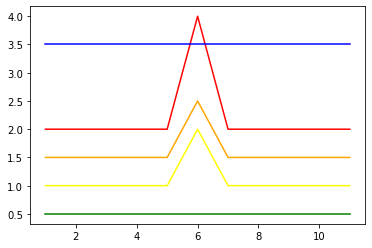

In [116]:
plt.plot([1,2,3,4,5,6,7,8,9,10,11],[2,2,2,2,2,4,2,2,2,2,2],color='red') 
plt.plot([1,2,3,4,5,6,7,8,9,10,11],[1.5,1.5,1.5,1.5,1.5,2.5,1.5,1.5,1.5,1.5,1.5],color='orange') 
plt.plot([1,2,3,4,5,6,7,8,9,10,11],[1,1,1,1,1,2,1,1,1,1,1],color='yellow') 
plt.plot([1,2,3,4,5,6,7,8,9,10,11],[0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5],color='green') 
plt.plot([1,2,3,4,5,6,7,8,9,10,11],[3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5],color='blue') 

빨주노초파 순으로 t = 1,2,3,4,5 라고 가정하면, 빨간색에서 anomaly값이 가장 크니까, $A(t)$의 값은 $a_{서울}(1)$에서 최대인 4가 된다.

Finally, a time tick t is labelled as an anomaly if $A_s(t)$ exceeds a fixed threshold. While different approaches could be employed to set the threshold such as extreme value theory (Siffer et al. 2017), to avoid introducing additional hyperparameters, we use in our experiments a simple approach of setting the threshold as the max of $A_s(t)$ over the validation data.

이 $A$를 threshold로 놓고 넘으면 이상치라 판별

## 4 Experiments

평가지표
- RQ1 (Accuracy): Does our method outperform baseline methods in accuracy of anomaly detection in multivariate time series, based on ground truth labelled anomalies?
    - Anomaly detection accuracy in terms of precision(%), recall(%), and F1-score
- RQ2 (Ablation): How do the various components of the method contribute to its performance?
- RQ3 (Interpretability of Model): How can we understand our model based on its embeddings and its learned graph structure?
- RQ4 (Localizing Anomalies): Can our method localize anomalies and help users to identify the affected sensors, as well as to understand how the anomaly deviates from the expected behavior?

dataset

The Secure Water Treatment (SWaT) 

Water Distribution (WADI)

크기가 너무 커서 10초의 중앙값을 가져오는 downsampling 진행 후 두 데이터셋 다 **2160**개 가지고 있음

In [120]:
S_train = pd.read_csv('https://raw.githubusercontent.com/d-ailin/GDN/main/data/msl/train.csv')
S_train

,timestamp,M-6,M-1,M-2,S-2,P-10,T-4,T-5,F-7,M-3,...,F-5,D-14,T-9,P-14,T-8,P-11,D-15,D-16,M-7,F-8
0,0,-1.0,0.999976,-0.748738,-1.0,0.994353,0.0,-1.0,-0.642857,1.000046,...,-0.059837,-1.0,-0.333329,0.999426,-1.0,0.941907,-1.000000,-1.000000,-1.001157,-0.826087
1,1,-1.0,0.999976,-0.748738,-1.0,0.993788,0.0,-1.0,-0.964286,1.000046,...,-0.059238,-1.0,-0.333329,0.999296,-1.0,0.944196,-1.000000,-1.000000,-1.001157,-0.869565
2,2,-1.0,0.999976,-0.748738,-1.0,0.994353,0.0,-1.0,-0.785714,1.000046,...,-0.059163,-1.0,-0.333329,0.999611,-1.0,0.943751,0.952800,0.983735,-1.001157,-0.869565
3,3,-1.0,0.999976,-0.748738,-1.0,0.993506,0.0,-1.0,-0.892857,1.000046,...,-0.058563,-1.0,-0.333329,0.999500,-1.0,0.941081,0.951874,-1.000000,-1.001157,-0.782609
4,4,-1.0,0.999976,-0.748738,-1.0,0.994353,0.0,-1.0,-0.964286,1.000046,...,-0.056016,-1.0,-1.000000,0.999519,-1.0,0.941653,-1.000000,-1.000000,-1.001157,-0.869565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,1560,-1.0,-0.621155,-1.036327,0.0,0.994070,0.0,-1.0,-0.928571,0.591862,...,0.013526,-1.0,0.000000,0.999500,0.0,0.598373,-1.000000,0.000000,-0.999096,-1.000000
1561,1561,-1.0,-0.622580,-1.031021,0.0,0.992094,0.0,-1.0,-0.928571,0.824871,...,0.015624,-1.0,0.000000,0.999352,0.0,0.659135,1.024063,0.000000,-0.999096,-1.000000
1562,1562,-1.0,-0.624111,-1.025695,0.0,0.991529,0.0,-1.0,0.964286,1.000022,...,-0.835887,-1.0,0.000000,0.999463,0.0,0.762036,1.023137,0.000000,-0.999096,-1.000000
1563,1563,-1.0,-0.625548,-1.020368,0.0,0.991529,0.0,-1.0,-0.964286,0.855654,...,-0.826820,-1.0,0.000000,0.999444,0.0,0.763498,-1.000000,0.000000,-0.999096,-1.000000


In [119]:
S_test = pd.read_csv('https://raw.githubusercontent.com/d-ailin/GDN/main/data/msl/test.csv')
S_test

,timestamp,M-6,M-1,M-2,S-2,P-10,T-4,T-5,F-7,M-3,...,D-14,T-9,P-14,T-8,P-11,D-15,D-16,M-7,F-8,attack
0,0,-1.000000,0.999906,-0.748738,-1.0,0.992941,0.0,-1.0,-0.892857,1.000000,...,-1.0,0.639967,0.992941,-1.0,0.930975,-1.000000,-1.000000,-0.999133,-1.000000,0.0
1,1,-1.000000,0.999906,-0.748738,-1.0,0.993788,0.0,-1.0,-0.892857,1.000000,...,-1.0,0.639967,0.993788,-1.0,0.918009,0.832485,-1.000000,-0.999133,-0.565217,0.0
2,2,-1.000000,0.999906,-0.748738,-1.0,0.993788,0.0,-1.0,-0.428571,1.000000,...,-1.0,0.639967,0.993788,-1.0,0.927861,0.831559,-1.000000,-0.999133,-1.000000,0.0
3,3,-1.000000,0.999906,-0.748738,-1.0,0.994635,0.0,-1.0,-0.500000,1.000000,...,-1.0,0.639967,0.994635,-1.0,0.921442,0.831559,-1.000000,-0.999133,-1.000000,0.0
4,4,-1.000000,0.999906,-0.748738,-1.0,0.994635,0.0,-1.0,-0.892857,1.000000,...,-1.0,0.637897,0.994635,-1.0,0.916484,0.831559,-1.000000,-0.999133,-1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,2044,129.891892,0.525484,0.977248,0.0,0.994353,0.0,-1.0,1.000000,-0.364356,...,-1.0,0.000000,0.994353,0.0,0.761019,1.244331,0.079743,-0.999602,-1.000000,1.0
2045,2045,129.891892,0.999965,-0.748749,0.0,0.993788,0.0,-1.0,1.000000,-0.893946,...,-1.0,0.000000,0.993788,0.0,0.749642,-1.000000,0.092316,-0.999602,-1.000000,1.0
2046,2046,129.891892,0.999965,-0.748749,0.0,0.992941,0.0,-1.0,0.821429,-1.377165,...,-1.0,0.000000,0.992941,0.0,0.719134,-1.000000,0.092316,-0.999602,-1.000000,1.0
2047,2047,129.891892,0.999965,-0.748749,0.0,0.993223,0.0,-1.0,0.071429,-0.796085,...,-1.0,0.000000,0.993223,0.0,0.734452,1.242480,-1.000000,-0.999602,-1.000000,1.0


In [145]:
listset = pd.read_csv('https://raw.githubusercontent.com/d-ailin/GDN/main/data/msl/list.txt',header=None)
listset

,0
0,M-6
1,M-1
2,M-2
3,S-2
4,P-10
5,T-4
6,T-5
7,F-7
8,M-3
9,M-4
